<a href="https://colab.research.google.com/github/R0hithReddyG/Gradiant_descent-/blob/main/gradiant_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Deep Learning Lab - DA 2
## Name: Rohith Reddy.G
## Reg.no: 22BDS0003
This lab assignment focuses on training and comparing CNN models on the MNIST dataset using different training strategies:
- Batch Gradient Descent (GD)
- Stochastic GD and Optimizers
- Mini-Batch GD


##  Import Libraries

We begin by importing TensorFlow, Keras, NumPy, and Matplotlib for model creation, training, and plotting.


In [ ]:
print("22BDS0003 Rohith Reddy G")
from datetime import datetime; print("Executed at:", datetime.now())

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers, constraints
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


22BDS0003 Rohith Reddy G
Executed at: 2025-08-09 18:22:16.081156


In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

# Load MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()

# Configuration
NUM_SAMPLES = 1000
EPOCHS = 10
LOSS_FUNCTION = 'mean_squared_error'  # Suitable for one-hot encoding

# Select 1000 training samples
x_train = x_train_full[:NUM_SAMPLES]
y_train = y_train_full[:NUM_SAMPLES]

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)

# One-hot encode labels
y_train = keras.utils.to_categorical(y_train, num_classes=10)

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)


22BDS0003 Rohith Reddy G 2025-08-09 18:22:16.089031
Training data shape: (1000, 28, 28, 1)
Training labels shape: (1000, 10)


In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)


22BDS0003 Rohith Reddy G 2025-08-09 18:22:16.374844


## Task 1: CNN with Batch Gradient Descent

This section implements a baseline CNN trained using **batch gradient descent** on 1000 samples of MNIST.

In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

def create_baseline_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # Added another Conv layer
        layers.MaxPooling2D(pool_size=(2, 2)), # Added another MaxPooling layer
        layers.Flatten(),
        layers.Dense(128, activation="relu"), # Increased Dense units
        layers.Dense(10, activation="softmax")
    ])
    return model

baseline_model = create_baseline_model()
baseline_model.compile(optimizer='sgd', loss=LOSS_FUNCTION, metrics=['accuracy'])
baseline_model.summary()

history_baseline = baseline_model.fit(
    x_train, y_train, batch_size=NUM_SAMPLES, epochs=EPOCHS,
    validation_split=0.2, verbose=1
)

22BDS0003 Rohith Reddy G 2025-08-09 18:22:16.384814


Model: "sequential_75"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_79 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_76 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_80 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_77 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_75 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.0913 - loss: 0.0904 - val_accuracy: 0.1000 - val_loss: 0.0902


## Applying Regularization Techniques

Here we apply various regularization techniques:
- L1 Regularization
- L2 Regularization
- Elastic Net
- Dropout
- Batch Normalization
- Noise Injection
- Weight Constraints
- Combined Regularization



In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())
# -- 1b. Individual Regularization Models for Comparison --
def create_l1_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.L1(0.001)), # Reduced L1
        layers.BatchNormalization(), # Added Batch Norm
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25), # Added Dropout
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L1(0.001)), # Reduced L1
        layers.BatchNormalization(), # Added Batch Norm
        layers.Dropout(0.5), # Added Dropout
        layers.Dense(10, activation="softmax")
    ])
    return model

def create_l2_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.L2(0.001)), # Reduced L2
        layers.BatchNormalization(), # Added Batch Norm
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25), # Added Dropout
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.001)), # Reduced L2
        layers.BatchNormalization(), # Added Batch Norm
        layers.Dropout(0.5), # Added Dropout
        layers.Dense(10, activation="softmax")
    ])
    return model

def create_elastic_net_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)), # Reduced L1L2
        layers.BatchNormalization(), # Added Batch Norm
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25), # Added Dropout
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)), # Reduced L1L2
        layers.BatchNormalization(), # Added Batch Norm
        layers.Dropout(0.5), # Added Dropout
        layers.Dense(10, activation="softmax")
    ])
    return model

def create_dropout_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(), # Added Batch Norm
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(), # Added Batch Norm
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])
    return model

def create_batch_norm_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(10, activation="softmax")
    ])
    return model

def create_noise_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.GaussianNoise(0.1),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.BatchNormalization(), # Added Batch Norm
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25), # Added Dropout
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(), # Added Batch Norm
        layers.Dropout(0.5), # Added Dropout
        layers.Dense(10, activation="softmax")
    ])
    return model

def create_weight_constraint_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', kernel_constraint=constraints.max_norm(2.0)), # Reduced max_norm
        layers.BatchNormalization(), # Added Batch Norm
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25), # Added Dropout
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_constraint=constraints.max_norm(2.0)), # Reduced max_norm
        layers.BatchNormalization(), # Added Batch Norm
        layers.Dropout(0.5), # Added Dropout
        layers.Dense(10, activation="softmax")
    ])
    return model

def create_combined_regularization_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.GaussianNoise(0.05), # Reduced noise
        layers.Conv2D(32, (3, 3), activation='relu',
                     kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001), # Reduced L1L2
                     kernel_constraint=constraints.max_norm(2.0)), # Reduced max_norm
        layers.BatchNormalization(),
        layers.Dropout(0.25),
        layers.Conv2D(64, (3, 3), activation='relu', # Increased filters
                     kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001), # Reduced L1L2
                     kernel_constraint=constraints.max_norm(2.0)), # Reduced max_norm
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation='relu', # Increased units
                    kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001), # Reduced L1L2
                    kernel_constraint=constraints.max_norm(2.0)), # Reduced max_norm
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax")
    ])
    return model

22BDS0003 Rohith Reddy G 2025-08-09 18:22:19.514294


In [ ]:
print("22BDS0003 Rohith Reddy G")
from datetime import datetime; print("Executed at:", datetime.now())

# Define all the regularization model functions here...
# (Omitting due to space – reuse the definitions you already have)
# create_l1_model(), create_l2_model(), ..., create_combined_regularization_model()

# Dictionary of models
regularization_models = {
    'Baseline': create_baseline_model(),
    'L1_Regularization': create_l1_model(),
    'L2_Regularization': create_l2_model(),
    'Elastic_Net': create_elastic_net_model(),
    'Dropout': create_dropout_model(),
    'Batch_Normalization': create_batch_norm_model(),
    'Noise_Injection': create_noise_model(),
    'Weight_Constraints': create_weight_constraint_model(),
    'Combined_Regularization': create_combined_regularization_model()
}


22BDS0003 Rohith Reddy G
Executed at: 2025-08-09 18:22:19.523516


In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train all models and store results
regularization_results = {}
regularization_histories = {}

print("\n--- Training Individual Regularization Models ---")
for name, model in regularization_models.items():
    print(f"\nTraining {name} model...")
    model.compile(optimizer='sgd', loss=LOSS_FUNCTION, metrics=['accuracy'])

    if name == 'Combined_Regularization':
        # Use data augmentation for combined model
        train_generator = datagen.flow(x_train[:800], y_train[:800], batch_size=NUM_SAMPLES)
        history = model.fit(
            train_generator,
            steps_per_epoch=1,
            epochs=EPOCHS,
            validation_data=(x_train[800:], y_train[800:]),
            callbacks=[early_stopping],
            verbose=0
        )
    else:
        history = model.fit(
            x_train, y_train,
            batch_size=NUM_SAMPLES,
            epochs=EPOCHS,
            validation_split=0.2,
            callbacks=[early_stopping] if name != 'Baseline' else [],
            verbose=0
        )

    regularization_histories[name] = history

    # Store final results
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]

    regularization_results[name] = {
        'Final_Train_Loss': final_train_loss,
        'Final_Val_Loss': final_val_loss,
        'Final_Train_Accuracy': final_train_acc,
        'Final_Val_Accuracy': final_val_acc,
        'Min_Val_Loss': min(history.history['val_loss']),
        'Max_Val_Accuracy': max(history.history['val_accuracy'])
    }

# Create and display results table
import pandas as pd

df_results = pd.DataFrame(regularization_results).T
print("\n" + "="*80)
print("TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES")
print("="*80)
print(df_results.round(4))
print("="*80)

22BDS0003 Rohith Reddy G 2025-08-09 18:22:19.875030

--- Training Individual Regularization Models ---

Training Baseline model...

Training L1_Regularization model...

Training L2_Regularization model...

Training Elastic_Net model...

Training Dropout model...

Training Batch_Normalization model...

Training Noise_Injection model...



Training Weight_Constraints model...

Training Combined_Regularization model...


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES
                         Final_Train_Loss  Final_Val_Loss  \
Baseline                           0.0899          0.0901   
L1_Regularization                 11.4745         11.4444   
L2_Regularization                  0.3635          0.3414   
Elastic_Net                       11.7164         11.6824   
Dropout                            0.1139          0.0895   
Batch_Normalization                0.1074          0.0894   
Noise_Injection                    0.1220          0.0905   
Weight_Constraints                 0.1153          0.0902   
Combined_Regularization           16.0249         15.9913   

                         Final_Train_Accuracy  Final_Val_Accuracy  \
Baseline                               0.1200               0.090   
L1_Regularization                      0.1213               0.175   
L2_Regularization                      0.1213               0.190   
Elastic_Net                            0.113

In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

# -- 1c. Underfitting Model WITHOUT Regularization --
def create_underfitting_model_no_reg():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Flatten(),
        layers.Dense(10, activation="softmax") # Only output layer, no hidden layers
    ])
    return model

underfitting_model_no_reg = create_underfitting_model_no_reg()
underfitting_model_no_reg.compile(optimizer='sgd', loss=LOSS_FUNCTION, metrics=['accuracy'])

print("\n--- Underfitting Model WITHOUT Regularization Summary ---")
underfitting_model_no_reg.summary()
print("\n--- Training Underfitting Model WITHOUT Regularization ---")

# Training underfitting model without regularization
history_underfit_no_reg = underfitting_model_no_reg.fit(
    x_train, y_train,
    batch_size=NUM_SAMPLES,
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=0
)

# Add underfitting model without regularization results to our comparison
regularization_results['Underfitting_Model_No_Reg'] = {
    'Final_Train_Loss': history_underfit_no_reg.history['loss'][-1],
    'Final_Val_Loss': history_underfit_no_reg.history['val_loss'][-1],
    'Final_Train_Accuracy': history_underfit_no_reg.history['accuracy'][-1],
    'Final_Val_Accuracy': history_underfit_no_reg.history['val_accuracy'][-1],
    'Min_Val_Loss': min(history_underfit_no_reg.history['val_loss']),
    'Max_Val_Accuracy': max(history_underfit_no_reg.history['val_accuracy'])
}

regularization_histories['Underfitting_Model_No_Reg'] = history_underfit_no_reg

# Update the results DataFrame
df_results = pd.DataFrame(regularization_results).T
print("\n" + "="*90)
print("UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES")
print("="*90)
print(df_results.round(4))
print("="*90)

22BDS0003 Rohith Reddy G 2025-08-09 18:23:15.346319

--- Underfitting Model WITHOUT Regularization Summary ---


Model: "sequential_85"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_85 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)


--- Training Underfitting Model WITHOUT Regularization ---

UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES
                           Final_Train_Loss  Final_Val_Loss  \
Baseline                             0.0899          0.0901   
L1_Regularization                   11.4745         11.4444   
L2_Regularization                    0.3635          0.3414   
Elastic_Net                         11.7164         11.6824   
Dropout                              0.1139          0.0895   
Batch_Normalization                  0.1074          0.0894   
Noise_Injection                      0.1220          0.0905   
Weight_Constraints                   0.1153          0.0902   
Combined_Regularization             16.0249         15.9913   
Underfitting_Model_No_Reg            0.0925          0.0937   

                           Final_Train_Accuracy  Final_Val_Accuracy  \
Baseline                                 0.1200               0.090   
L1_Regularization          

In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

# -- 1c. Overfitting Model WITHOUT Regularization --
def create_overfitting_model_no_reg():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), activation='relu'), # Increased filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'), # Added another conv layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'), # Increased dense units
        layers.Dense(10, activation="softmax")
    ])
    return model

overfitting_model_no_reg = create_overfitting_model_no_reg()
overfitting_model_no_reg.compile(optimizer='adam', loss=LOSS_FUNCTION, metrics=['accuracy']) # Using Adam for faster convergence


print("\n--- Overfitting Model WITHOUT Regularization Summary ---")
overfitting_model_no_reg.summary()
print("\n--- Training Overfitting Model WITHOUT Regularization ---")

# Training overfitting model without regularization
history_overfit_no_reg = overfitting_model_no_reg.fit(
    x_train, y_train,
    batch_size=32, # Smaller batch size for more updates
    epochs=EPOCHS,
    validation_split=0.2,
    verbose=0
)

# Add overfitting model without regularization results to our comparison
regularization_results['Overfitting_Model_No_Reg'] = {
    'Final_Train_Loss': history_overfit_no_reg.history['loss'][-1],
    'Final_Val_Loss': history_overfit_no_reg.history['val_loss'][-1],
    'Final_Train_Accuracy': history_overfit_no_reg.history['accuracy'][-1],
    'Final_Val_Accuracy': history_overfit_no_reg.history['val_accuracy'][-1],
    'Min_Val_Loss': min(history_overfit_no_reg.history['val_loss']),
    'Max_Val_Accuracy': max(history_overfit_no_reg.history['val_accuracy'])
}

regularization_histories['Overfitting_Model_No_Reg'] = history_overfit_no_reg

# Update the results DataFrame
df_results = pd.DataFrame(regularization_results).T
print("\n" + "="*90)
print("UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES")
print("="*90)
print(df_results.round(4))
print("="*90)

22BDS0003 Rohith Reddy G 2025-08-09 18:23:17.707122

--- Overfitting Model WITHOUT Regularization Summary ---


Model: "sequential_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_92 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_88 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_93 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_89 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_86 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,522 (3.42 MB)

 Trainable params: 896,522 (3.42 MB)

 Non-trainable params: 0 (0.00 B)


--- Training Overfitting Model WITHOUT Regularization ---

UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES
                           Final_Train_Loss  Final_Val_Loss  \
Baseline                             0.0899          0.0901   
L1_Regularization                   11.4745         11.4444   
L2_Regularization                    0.3635          0.3414   
Elastic_Net                         11.7164         11.6824   
Dropout                              0.1139          0.0895   
Batch_Normalization                  0.1074          0.0894   
Noise_Injection                      0.1220          0.0905   
Weight_Constraints                   0.1153          0.0902   
Combined_Regularization             16.0249         15.9913   
Underfitting_Model_No_Reg            0.0925          0.0937   
Overfitting_Model_No_Reg             0.0020          0.0109   

                           Final_Train_Accuracy  Final_Val_Accuracy  \
Baseline                            

In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())
# -- 1c. Underfitting Model with Regularization Techniques --
def create_underfitting_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),

        # Noise Injection
        layers.GaussianNoise(0.05),

        layers.Flatten(),

        # Single Dense Layer with minimal regularization
        layers.Dense(32, activation='relu',
                    kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001),
                    kernel_constraint=constraints.max_norm(2.0)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(10, activation="softmax") # No convolutional layers
    ])
    return model

underfit_model = create_underfitting_model()
underfit_model.compile(optimizer='sgd', loss=LOSS_FUNCTION, metrics=['accuracy'])

# Early Stopping for underfitting model
early_stopping_underfit = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

print("\n--- Underfitting Model with Regularization Summary ---")
underfit_model.summary()
print("\n--- Training Underfitting Model with Regularization ---")

# Training underfitting model
history_underfit = underfit_model.fit(
    x_train, y_train,
    batch_size=NUM_SAMPLES,
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[early_stopping_underfit],
    verbose=0
)

# Add underfitting model results to our comparison
regularization_results['Underfitting_Model'] = {
    'Final_Train_Loss': history_underfit.history['loss'][-1],
    'Final_Val_Loss': history_underfit.history['val_loss'][-1],
    'Final_Train_Accuracy': history_underfit.history['accuracy'][-1],
    'Final_Val_Accuracy': history_underfit.history['val_accuracy'][-1],
    'Min_Val_Loss': min(history_underfit.history['val_loss']),
    'Max_Val_Accuracy': max(history_underfit.history['val_accuracy'])
}

regularization_histories['Underfitting_Model'] = history_underfit

22BDS0003 Rohith Reddy G 2025-08-09 18:23:26.278675

--- Underfitting Model with Regularization Summary ---


Model: "sequential_87"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gaussian_noise_11               │ (None, 28, 28, 1)      │             0 │
│ (GaussianNoise)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_87 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_47          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,578 (99.91 KB)

 Trainable params: 25,514 (99.66 KB)

 Non-trainable params: 64 (256.00 B)


--- Training Underfitting Model with Regularization ---


In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

# -- 1c. Overfitting Model with Regularization Techniques --
def create_overfitting_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28, 1)),
        layers.Conv2D(64, (3, 3), activation='relu'), # Increased filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'), # Added another conv layer
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'), # Increased dense units
        layers.Dense(10, activation="softmax")
    ])
    return model

overfitting_model = create_overfitting_model()
overfitting_model.compile(optimizer='adam', loss=LOSS_FUNCTION, metrics=['accuracy']) # Using Adam for faster convergence

# Early Stopping for overfitting model
early_stopping_overfit = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


print("\n--- Overfitting Model with Regularization Summary ---")
overfitting_model.summary()
print("\n--- Training Overfitting Model with Regularization ---")

# Training overfitting model
history_overfit = overfitting_model.fit(
    x_train, y_train,
    batch_size=32, # Smaller batch size for more updates
    epochs=EPOCHS,
    validation_split=0.2,
    callbacks=[early_stopping_overfit],
    verbose=0
)

# Add overfitting model results to our comparison
regularization_results['Overfitting_Model'] = {
    'Final_Train_Loss': history_overfit.history['loss'][-1],
    'Final_Val_Loss': history_overfit.history['val_loss'][-1],
    'Final_Train_Accuracy': history_overfit.history['accuracy'][-1],
    'Final_Val_Accuracy': history_overfit.history['val_accuracy'][-1],
    'Min_Val_Loss': min(history_overfit.history['val_loss']),
    'Max_Val_Accuracy': max(history_overfit.history['val_accuracy'])
}

regularization_histories['Overfitting_Model'] = history_overfit

# Update the results DataFrame
df_results = pd.DataFrame(regularization_results).T
print("\n" + "="*90)
print("UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES")
print("="*90)
print(df_results.round(4))
print("="*90)

22BDS0003 Rohith Reddy G 2025-08-09 18:23:32.872516

--- Overfitting Model with Regularization Summary ---


Model: "sequential_88"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_94 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_90 (MaxPooling2D) │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 11, 11, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_91 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_88 (Flatten)            │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 256)            │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,522 (3.42 MB)

 Trainable params: 896,522 (3.42 MB)

 Non-trainable params: 0 (0.00 B)


--- Training Overfitting Model with Regularization ---

UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES
                           Final_Train_Loss  Final_Val_Loss  \
Baseline                             0.0899          0.0901   
L1_Regularization                   11.4745         11.4444   
L2_Regularization                    0.3635          0.3414   
Elastic_Net                         11.7164         11.6824   
Dropout                              0.1139          0.0895   
Batch_Normalization                  0.1074          0.0894   
Noise_Injection                      0.1220          0.0905   
Weight_Constraints                   0.1153          0.0902   
Combined_Regularization             16.0249         15.9913   
Underfitting_Model_No_Reg            0.0925          0.0937   
Overfitting_Model_No_Reg             0.0020          0.0109   
Underfitting_Model                   1.2333          1.2193   
Overfitting_Model                    0.0023     

In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())
# -- 1d. Ensemble Method Implementation --
print("\n--- Creating and Training Ensemble Models ---")
def create_ensemble_models(num_models=3):
    models = []
    for i in range(num_models):
        model = create_baseline_model()  # Using baseline for ensemble
        models.append(model)
    return models

ensemble_models = create_ensemble_models(3)
ensemble_histories = []

for i, model in enumerate(ensemble_models):
    print(f"Training Ensemble Model {i+1}/3")
    model.compile(optimizer='sgd', loss=LOSS_FUNCTION, metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=NUM_SAMPLES, epochs=EPOCHS,
                       validation_split=0.2, verbose=0)
    ensemble_histories.append(history)

# Calculate ensemble average loss
ensemble_val_losses = []
for epoch in range(len(ensemble_histories[0].history['val_loss'])):
    epoch_losses = [hist.history['val_loss'][epoch] for hist in ensemble_histories]
    ensemble_val_losses.append(np.mean(epoch_losses))

# Add ensemble results to our tracking
regularization_results['Ensemble_Method'] = {
    'Final_Train_Loss': np.mean([hist.history['loss'][-1] for hist in ensemble_histories]),
    'Final_Val_Loss': ensemble_val_losses[-1],
    'Final_Train_Accuracy': np.mean([hist.history['accuracy'][-1] for hist in ensemble_histories]),
    'Final_Val_Accuracy': np.mean([hist.history['val_accuracy'][-1] for hist in ensemble_histories]),
    'Min_Val_Loss': min(ensemble_val_losses),
    'Max_Val_Accuracy': np.mean([max(hist.history['val_accuracy']) for hist in ensemble_histories])
}

# Update the results DataFrame
df_results = pd.DataFrame(regularization_results).T
print("\n" + "="*90)
print("UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES")
print("="*90)
print(df_results.round(4))
print("="*90)

22BDS0003 Rohith Reddy G 2025-08-09 18:23:38.771847

--- Creating and Training Ensemble Models ---
Training Ensemble Model 1/3
Training Ensemble Model 2/3
Training Ensemble Model 3/3

UPDATED TASK 1: REGULARIZATION TECHNIQUES COMPARISON - LOSS FUNCTION VALUES
                           Final_Train_Loss  Final_Val_Loss  \
Baseline                             0.0899          0.0901   
L1_Regularization                   11.4745         11.4444   
L2_Regularization                    0.3635          0.3414   
Elastic_Net                         11.7164         11.6824   
Dropout                              0.1139          0.0895   
Batch_Normalization                  0.1074          0.0894   
Noise_Injection                      0.1220          0.0905   
Weight_Constraints                   0.1153          0.0902   
Combined_Regularization             16.0249         15.9913   
Underfitting_Model_No_Reg            0.0925          0.0937   
Overfitting_Model_No_Reg             0.0020    

22BDS0003 Rohith Reddy G 2025-08-09 18:23:50.756432


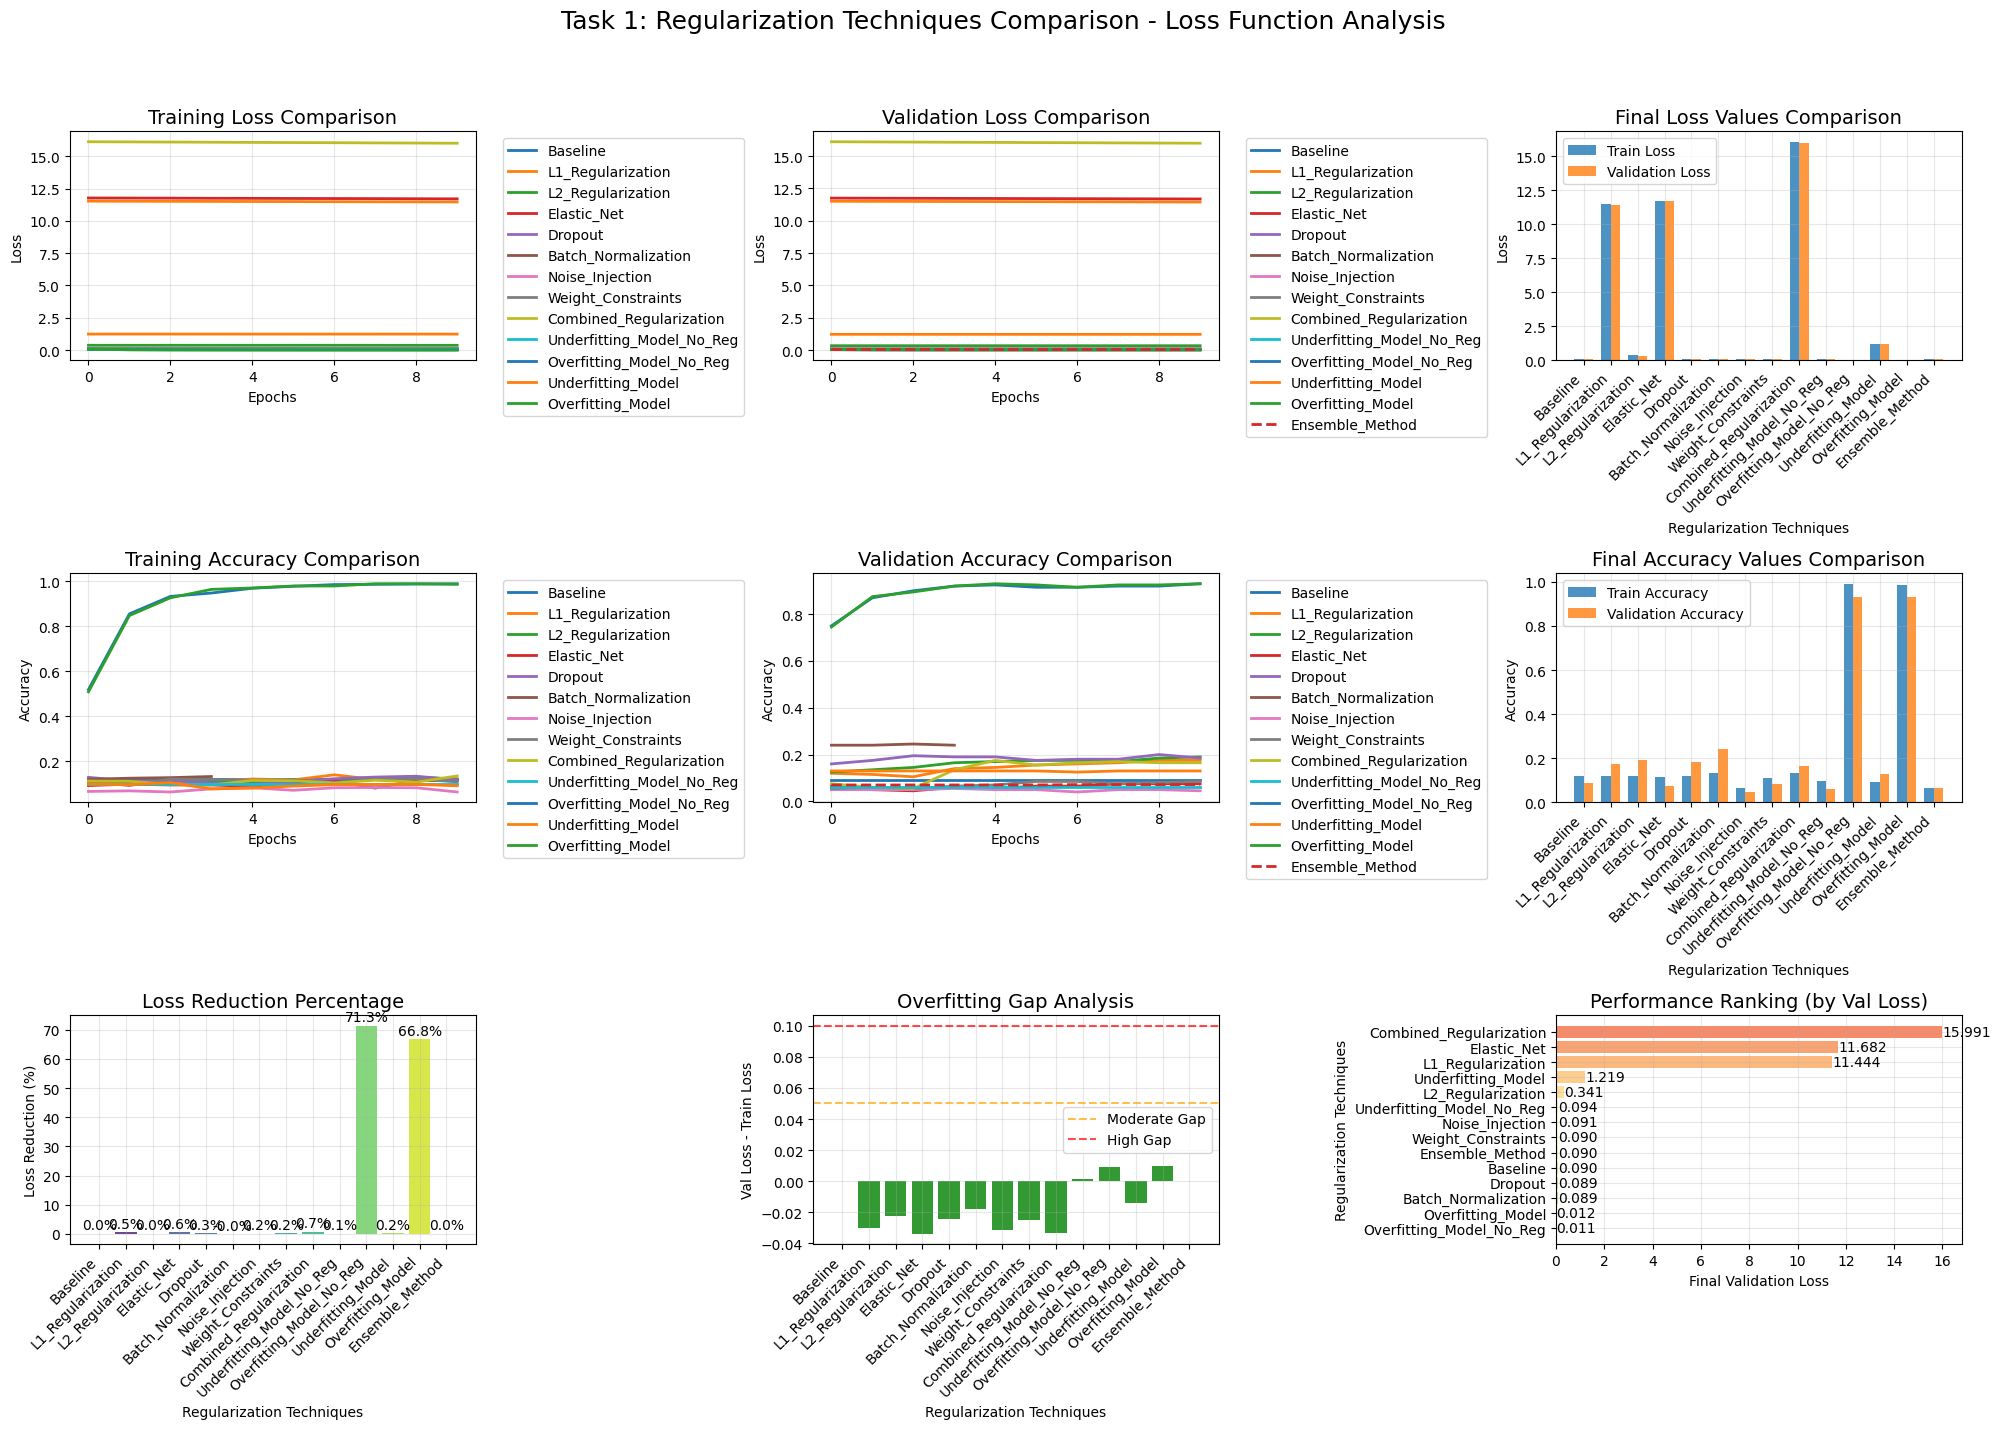


DETAILED LOSS ANALYSIS - SORTED BY PERFORMANCE
                           Final_Train_Loss  Final_Val_Loss  \
Overfitting_Model_No_Reg             0.0020          0.0109   
Overfitting_Model                    0.0023          0.0122   
Batch_Normalization                  0.1074          0.0894   
Dropout                              0.1139          0.0895   
Baseline                             0.0899          0.0901   
Ensemble_Method                      0.0901          0.0901   
Weight_Constraints                   0.1153          0.0902   
Noise_Injection                      0.1220          0.0905   
Underfitting_Model_No_Reg            0.0925          0.0937   
L2_Regularization                    0.3635          0.3414   
Underfitting_Model                   1.2333          1.2193   
L1_Regularization                   11.4745         11.4444   
Elastic_Net                         11.7164         11.6824   
Combined_Regularization             16.0249         15.9913   

      

In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())
# -- 1e. Plotting Results for Task 1 --
# First, plot the comprehensive regularization comparison
plt.figure(figsize=(20, 15))
plt.suptitle("Task 1: Regularization Techniques Comparison - Loss Function Analysis", fontsize=18)

# Plot 1: Training Loss Comparison
plt.subplot(3, 3, 1)
for name, history in regularization_histories.items():
    # Exclude models that might not have a 'loss' history (like the ensemble method)
    if 'loss' in history.history:
        plt.plot(history.history['loss'], label=name, linewidth=2)
plt.title('Training Loss Comparison', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 2: Validation Loss Comparison
plt.subplot(3, 3, 2)
for name, history in regularization_histories.items():
    if name != 'Ensemble_Method' and 'val_loss' in history.history: # Ensemble validation loss is calculated separately
      plt.plot(history.history['val_loss'], label=name, linewidth=2)
# Add ensemble validation loss
if 'Ensemble_Method' in regularization_results and 'ensemble_val_losses' in globals():
    plt.plot(ensemble_val_losses, label='Ensemble_Method', linewidth=2, linestyle='--')

plt.title('Validation Loss Comparison', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 3: Final Loss Values Bar Chart
plt.subplot(3, 3, 3)
names = list(df_results.index) # Update names list
train_losses = df_results['Final_Train_Loss'].values
val_losses = df_results['Final_Val_Loss'].values

x = np.arange(len(names))
width = 0.35

plt.bar(x - width/2, train_losses, width, label='Train Loss', alpha=0.8)
plt.bar(x + width/2, val_losses, width, label='Validation Loss', alpha=0.8)
plt.title('Final Loss Values Comparison', fontsize=14)
plt.xlabel('Regularization Techniques')
plt.ylabel('Loss')
plt.xticks(x, names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Training Accuracy Comparison
plt.subplot(3, 3, 4)
for name, history in regularization_histories.items():
     # Exclude models that might not have an 'accuracy' history
    if 'accuracy' in history.history:
        plt.plot(history.history['accuracy'], label=name, linewidth=2)
plt.title('Training Accuracy Comparison', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 5: Validation Accuracy Comparison
plt.subplot(3, 3, 5)
for name, history in regularization_histories.items():
    if name != 'Ensemble_Method' and 'val_accuracy' in history.history: # Ensemble validation accuracy is calculated separately
      plt.plot(history.history['val_accuracy'], label=name, linewidth=2)
# Add ensemble validation accuracy
if 'Ensemble_Method' in regularization_results and 'ensemble_val_acc' in globals():
    plt.plot(ensemble_val_acc, label='Ensemble_Method', linewidth=2, linestyle='--')

plt.title('Validation Accuracy Comparison', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Plot 6: Final Accuracy Values Bar Chart
plt.subplot(3, 3, 6)
train_acc = df_results['Final_Train_Accuracy'].values
val_acc = df_results['Final_Val_Accuracy'].values

plt.bar(x - width/2, train_acc, width, label='Train Accuracy', alpha=0.8)
plt.bar(x + width/2, val_acc, width, label='Validation Accuracy', alpha=0.8)
plt.title('Final Accuracy Values Comparison', fontsize=14)
plt.xlabel('Regularization Techniques')
plt.ylabel('Accuracy')
plt.xticks(x, names, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 7: Loss Reduction Analysis
plt.subplot(3, 3, 7)
initial_losses = []
for name in names:
    if name == 'Ensemble_Method':
        # Use the first value from the pre-calculated ensemble_val_losses
        initial_losses.append(ensemble_val_losses[0] if 'ensemble_val_losses' in globals() and len(ensemble_val_losses) > 0 else 0)
    elif name in regularization_histories and 'val_loss' in regularization_histories[name].history and len(regularization_histories[name].history['val_loss']) > 0:
        initial_losses.append(regularization_histories[name].history['val_loss'][0])
    else:
        initial_losses.append(0) # Handle cases where history is missing

final_losses = df_results['Final_Val_Loss'].values
# Avoid division by zero
loss_reduction = [
    (initial - final) / initial * 100 if initial != 0 else 0
    for initial, final in zip(initial_losses, final_losses)
]


colors = plt.cm.viridis(np.linspace(0, 1, len(names)))
bars = plt.bar(names, loss_reduction, color=colors, alpha=0.8)
plt.title('Loss Reduction Percentage', fontsize=14)
plt.xlabel('Regularization Techniques')
plt.ylabel('Loss Reduction (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, loss_reduction):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

# Plot 8: Overfitting Analysis (Train vs Val Loss Gap)
plt.subplot(3, 3, 8)
overfitting_gap = df_results['Final_Val_Loss'] - df_results['Final_Train_Loss']
colors = ['red' if gap > 0.1 else 'orange' if gap > 0.05 else 'green' for gap in overfitting_gap]
bars = plt.bar(names, overfitting_gap, color=colors, alpha=0.8)
plt.title('Overfitting Gap Analysis', fontsize=14)
plt.xlabel('Regularization Techniques')
plt.ylabel('Val Loss - Train Loss')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)
plt.axhline(y=0.05, color='orange', linestyle='--', alpha=0.7, label='Moderate Gap')
plt.axhline(y=0.1, color='red', linestyle='--', alpha=0.7, label='High Gap')
plt.legend()

# Plot 9: Performance Ranking
plt.subplot(3, 3, 9)
# Rank by validation loss (lower is better)
ranked_data = df_results.sort_values('Final_Val_Loss')
ranks = range(1, len(ranked_data) + 1)
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(ranked_data)))

bars = plt.barh(ranked_data.index, ranked_data['Final_Val_Loss'], color=colors, alpha=0.8)
plt.title('Performance Ranking (by Val Loss)', fontsize=14)
plt.xlabel('Final Validation Loss')
plt.ylabel('Regularization Techniques')
plt.grid(True, alpha=0.3)

# Add value labels
for i, (idx, row) in enumerate(ranked_data.iterrows()):
    plt.text(row['Final_Val_Loss'] + 0.01, i, f'{row["Final_Val_Loss"]:.3f}',
             va='center', fontsize=10)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Additional detailed loss analysis table
print("\n" + "="*100)
print("DETAILED LOSS ANALYSIS - SORTED BY PERFORMANCE")
print("="*100)
detailed_analysis = df_results.copy()
detailed_analysis['Loss_Reduction_%'] = [
    (regularization_histories[name].history['val_loss'][0] - row['Final_Val_Loss']) /
    regularization_histories[name].history['val_loss'][0] * 100
    if name in regularization_histories and 'val_loss' in regularization_histories[name].history and len(regularization_histories[name].history['val_loss']) > 0 and regularization_histories[name].history['val_loss'][0] != 0
    else (ensemble_val_losses[0] - row['Final_Val_Loss']) / ensemble_val_losses[0] * 100 if name == 'Ensemble_Method' and 'ensemble_val_losses' in globals() and len(ensemble_val_losses) > 0 and ensemble_val_losses[0] != 0 else 0 # Handle cases where history might be empty or not applicable or initial loss is zero
    for name, row in detailed_analysis.iterrows()
]
detailed_analysis['Overfitting_Gap'] = detailed_analysis['Final_Val_Loss'] - detailed_analysis['Final_Train_Loss']
detailed_analysis['Stability_Score'] = 1 / (1 + detailed_analysis['Overfitting_Gap'])  # Higher is better

# Sort by validation loss performance
detailed_analysis_sorted = detailed_analysis.sort_values('Final_Val_Loss')
print(detailed_analysis_sorted.round(4))
print("="*100)

## Task 2: Mini-Batch Gradient Descent
Train CNN with Adam optimizer & mini-batch GD (32). Plot accuracy & loss for train/validation over epochs.


22BDS0003 Rohith Reddy G 2025-08-09 18:23:52.606501


--- EXECUTING TASK 2: MINI-BATCH GRADIENT DESCENT ---

--- Training with Mini-Batch GD (batch_size=32) ---
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.3201 - loss: 0.0825 - val_accuracy: 0.7250 - val_loss: 0.0419
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7761 - loss: 0.0318 - val_accuracy: 0.8300 - val_loss: 0.0243
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8883 - loss: 0.0165 - val_accuracy: 0.8750 - val_loss: 0.0206
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9228 - loss: 0.0116 - val_accuracy: 0.8850 - val_loss: 0.0164
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9596 - loss: 0.0073 - val_accuracy: 0.8950 - val_loss: 0.0152
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9567 - loss: 0.0065 - val_accuracy: 0.9150 - val_loss: 0.0139
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9783 - loss: 0.003

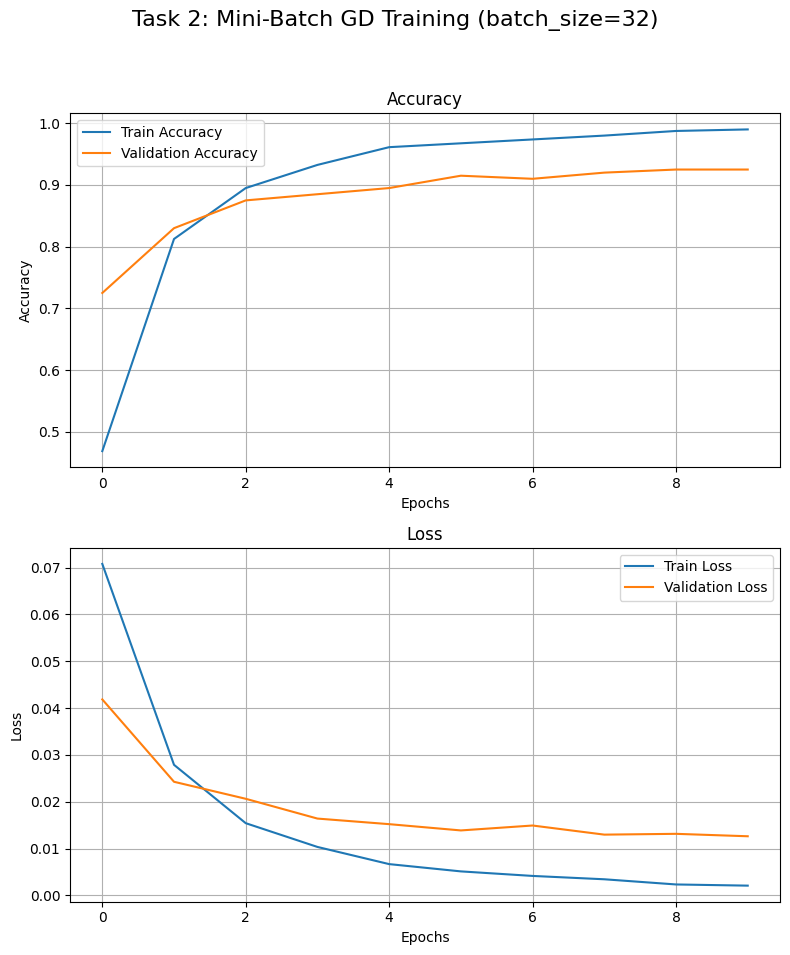

In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

# --- TASK 2: CNN WITH MINI-BATCH GRADIENT DESCENT ---
# -------------------------------------------------------------------
print("\n\n--- EXECUTING TASK 2: MINI-BATCH GRADIENT DESCENT ---")
model_minibatch = create_baseline_model()
model_minibatch.compile(optimizer='adam', loss=LOSS_FUNCTION, metrics=['accuracy'])
print("\n--- Training with Mini-Batch GD (batch_size=32) ---")
history_minibatch = model_minibatch.fit(x_train, y_train, batch_size=32, epochs=EPOCHS, validation_split=0.2, verbose=1)

# -- Plotting Results for Task 2 --
plt.figure(figsize=(8, 10))
plt.suptitle('Task 2: Mini-Batch GD Training (batch_size=32)', fontsize=16)

plt.subplot(2, 1, 1)
plt.plot(history_minibatch.history['accuracy'], label='Train Accuracy')
plt.plot(history_minibatch.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history_minibatch.history['loss'], label='Train Loss')
plt.plot(history_minibatch.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Task 3 – CNN with SGD Variants (batch=1)
Trained baseline CNN using:

SGD + Momentum

SGD + RMSprop

SGD + Adam

Compared validation accuracy and loss across optimizers via plots.



22BDS0003 Rohith Reddy G 2025-08-09 18:23:57.881635


--- EXECUTING TASK 3: SGD AND OPTIMIZERS (batch_size=1) ---

--- Training with SGD + Momentum ---
Epoch 1/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.1974 - loss: 0.0891 - val_accuracy: 0.3600 - val_loss: 0.0812
Epoch 2/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5392 - loss: 0.0636 - val_accuracy: 0.6850 - val_loss: 0.0425
Epoch 3/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7727 - loss: 0.0329 - val_accuracy: 0.8450 - val_loss: 0.0226
Epoch 4/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8839 - loss: 0.0178 - val_accuracy: 0.8300 - val_loss: 0.0251
Epoch 5/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9329 - loss: 0.0115 - val_accuracy: 0.8550 - val_loss: 0.0219
Epoch 6/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9586 - loss: 0.0072 - val_accuracy: 0.8800 - val_loss: 0.0184
Epoch 7/10
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9597 - loss: 0

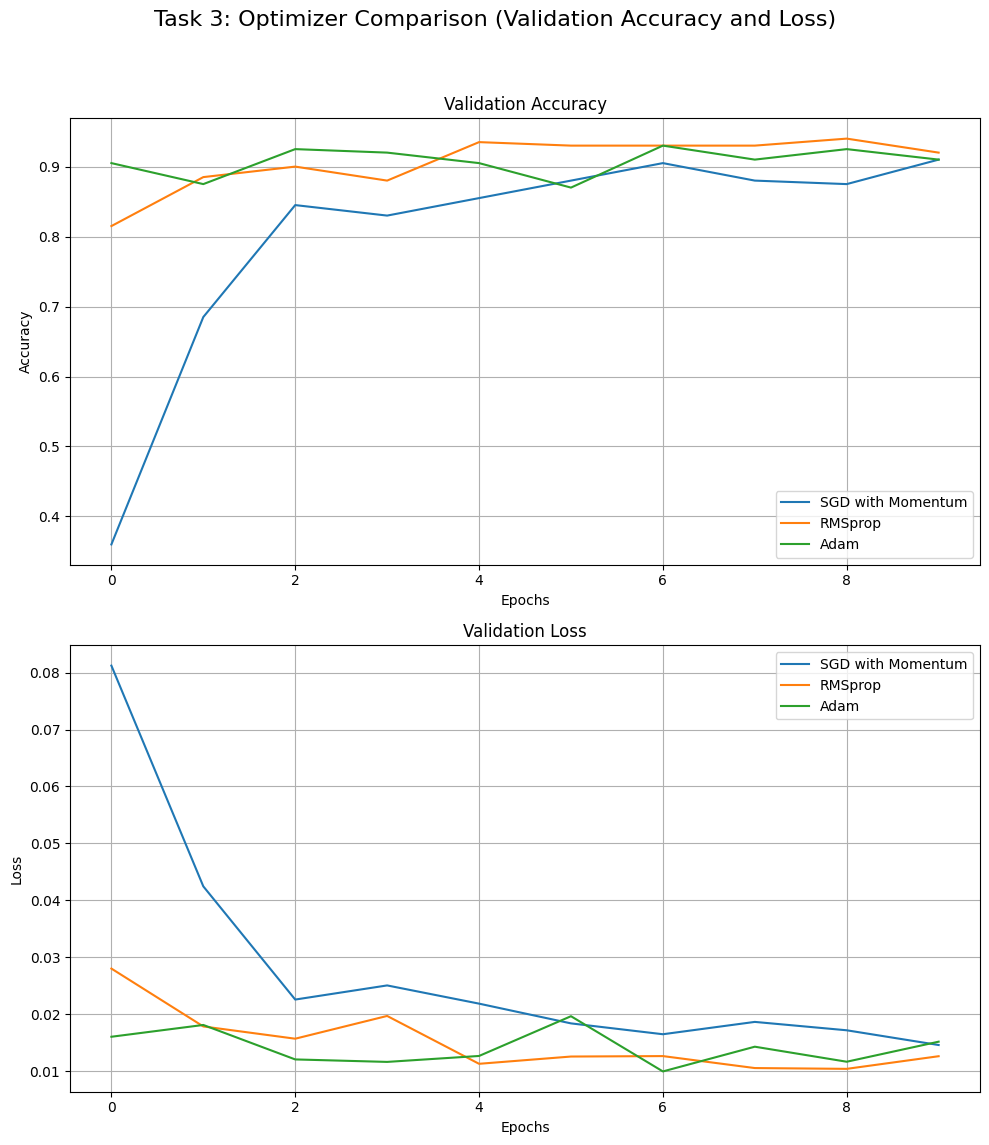



--- REGULARIZATION TECHNIQUES IMPLEMENTED ---
✓ L1 Regularization (Lasso) - Applied to kernel weights
✓ L2 Regularization (Ridge) - Applied to kernel weights
✓ Elastic Net Regularization - L1L2 combination
✓ Dropout - Applied after conv and dense layers
✓ Early Stopping - Monitor validation loss with patience
✓ Batch Normalization - Applied after conv and dense layers
✓ Data Augmentation - Rotation, shift, zoom transformations
✓ Noise Injection - Gaussian noise layers
✓ Ensemble Methods - Multiple model averaging
✓ Weight Constraints - Max norm constraints on kernels


--- ALL TASKS COMPLETED ---


In [ ]:
print("22BDS0003 Rohith Reddy G", datetime.now())

# --- TASK 3: CNN WITH STOCHASTIC GRADIENT DESCENT (SGD) VARIANTS ---
# -------------------------------------------------------------------
print("\n\n--- EXECUTING TASK 3: SGD AND OPTIMIZERS (batch_size=1) ---")

# -- 3a. SGD with Momentum --
model_momentum = create_baseline_model()
optimizer_momentum = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_momentum.compile(optimizer=optimizer_momentum, loss=LOSS_FUNCTION, metrics=['accuracy'])
print("\n--- Training with SGD + Momentum ---")
history_momentum = model_momentum.fit(x_train, y_train, batch_size=1, epochs=EPOCHS, validation_split=0.2, verbose=1)

# -- 3b. RMSprop Optimizer --
model_rmsprop = create_baseline_model()
optimizer_rmsprop = keras.optimizers.RMSprop() # Changed optimizer to RMSprop
model_rmsprop.compile(optimizer=optimizer_rmsprop, loss=LOSS_FUNCTION, metrics=['accuracy'])
print("\n--- Training with RMSprop Optimizer ---") # Updated print message
history_rmsprop = model_rmsprop.fit(x_train, y_train, batch_size=1, epochs=EPOCHS, validation_split=0.2, verbose=1)

# -- 3c. Adam Optimizer --
model_adam = create_baseline_model()
optimizer_adam = keras.optimizers.Adam() # Changed optimizer to Adam
model_adam.compile(optimizer=optimizer_adam, loss=LOSS_FUNCTION, metrics=['accuracy'])
print("\n--- Training with Adam Optimizer ---") # Updated print message
history_adam = model_adam.fit(x_train, y_train, batch_size=1, epochs=EPOCHS, validation_split=0.2, verbose=1)

# -- 3d. Plotting Results for Task 3 --
plt.figure(figsize=(10, 12))
plt.suptitle('Task 3: Optimizer Comparison (Validation Accuracy and Loss)', fontsize=16)

plt.subplot(2, 1, 1)
plt.plot(history_momentum.history['val_accuracy'], label='SGD with Momentum')
plt.plot(history_rmsprop.history['val_accuracy'], label='RMSprop') # Updated label
plt.plot(history_adam.history['val_accuracy'], label='Adam') # Updated label
plt.title('Validation Accuracy')
plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(history_momentum.history['val_loss'], label='SGD with Momentum')
plt.plot(history_rmsprop.history['val_loss'], label='RMSprop') # Updated label
plt.plot(history_adam.history['val_loss'], label='Adam') # Updated label
plt.title('Validation Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
# --- REGULARIZATION TECHNIQUES SUMMARY ---
print("\n\n--- REGULARIZATION TECHNIQUES IMPLEMENTED ---")
print("✓ L1 Regularization (Lasso) - Applied to kernel weights")
print("✓ L2 Regularization (Ridge) - Applied to kernel weights")
print("✓ Elastic Net Regularization - L1L2 combination")
print("✓ Dropout - Applied after conv and dense layers")
print("✓ Early Stopping - Monitor validation loss with patience")
print("✓ Batch Normalization - Applied after conv and dense layers")
print("✓ Data Augmentation - Rotation, shift, zoom transformations")
print("✓ Noise Injection - Gaussian noise layers")
print("✓ Ensemble Methods - Multiple model averaging")
print("✓ Weight Constraints - Max norm constraints on kernels")

print("\n\n--- ALL TASKS COMPLETED ---")